In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
def classify_tl(image):
    img_hsv = cv2.resize(image, (400, 300))
        
    # lower mask (0-10)
    lower_red = np.array([0,50,50])
    upper_red = np.array([10,255,255])
    
    lower_yellow = np.array([20,150,150])
    upper_yellow = np.array([30,255,255])

    lower_green = np.array([50,100,100])
    upper_green = np.array([70,255,255])
    
    
    mask = np.array([cv2.inRange(img_hsv, lower_red, upper_red),
                     cv2.inRange(img_hsv, lower_yellow, upper_yellow),
                     cv2.inRange(img_hsv, lower_green, upper_green)])
    
    
    mask_sum = np.sum(np.sum(mask, axis=1), axis=1)
    label = np.argmax(mask_sum)
    
    if mask_sum[label] < 10:
        label = 4
        

    # or your HSV image, which I *believe* is what you want
#     output_hsv = img_hsv.copy()
#     output_hsv[np.where(mask==0)] = 0

    return mask, label

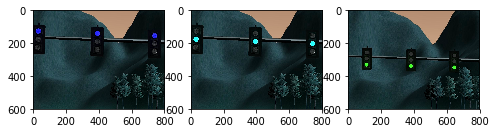

In [62]:
img_red = cv2.imread('./rec_images/'+str(1945)+'.jpeg')
img_yellow = cv2.imread('./rec_images/'+str(1937)+'.jpeg')
img_green = cv2.imread('./rec_images/'+str(1758)+'.jpeg')
# resized_image = cv2.resize(img, (400, 300))
fig=plt.figure(figsize=(8, 8))

fig.add_subplot(1, 3, 1)
plt.imshow(img_red)
fig.add_subplot(1, 3, 2)
plt.imshow(img_yellow)
fig.add_subplot(1, 3, 3)
plt.imshow(img_green)
# plt.imshow(img[0:300, 5:600])

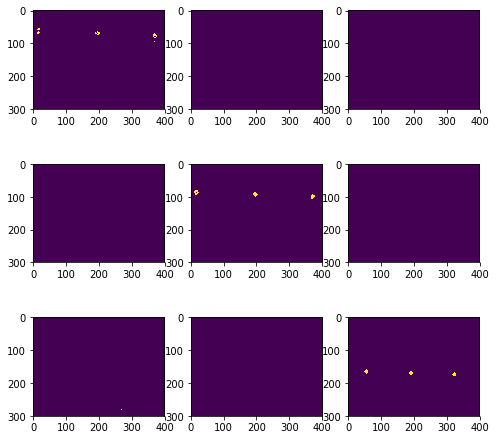

In [63]:
# img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask_red, label_red = classify_tl(cv2.cvtColor(img_red, cv2.COLOR_BGR2HSV))
mask_yellow, label_yellow = classify_tl(cv2.cvtColor(img_yellow, cv2.COLOR_BGR2HSV))
mask_green, label_green = classify_tl(cv2.cvtColor(img_green, cv2.COLOR_BGR2HSV))

# print("label: " + str(label))

w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(mask_red[0])
fig.add_subplot(rows, columns, 2)
plt.imshow(mask_red[1])
fig.add_subplot(rows, columns, 3)
plt.imshow(mask_red[2])

fig.add_subplot(rows, columns, 4)
plt.imshow(mask_yellow[0])
fig.add_subplot(rows, columns, 5)
plt.imshow(mask_yellow[1])
fig.add_subplot(rows, columns, 6)
plt.imshow(mask_yellow[2])

fig.add_subplot(rows, columns, 7)
plt.imshow(mask_green[0])
fig.add_subplot(rows, columns, 8)
plt.imshow(mask_green[1])
fig.add_subplot(rows, columns, 9)
plt.imshow(mask_green[2])

    
plt.show()
# plt.imshow(img_hsv)

In [ ]:
8